<a href="https://colab.research.google.com/github/darya-nrgs/notebooks-my_colab_files/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir=rtl> </div>

<div dir="rtl">
</div>
<p></p>
<div dir="rtl">
یکی از جذابیت‌های یادگیری ماشین کاربرد آن در صنایع مختلف است اما یکی از صنایعی که شاید بتواند حداکثر بهره را از این علم ببرد صنعت بانکداری‌ست. برای این منظور به سراغ اطلاعات بانکی هزار نفر می‌رویم و سعی می‌کنیم تحلیلی روی این داده‌های بانکی داشته باشیم.    
</div>

<div dir="rtl">
توجه داشته باشید که در این تمرین قرار بر کد نویسی‌است و برای پیاده‌سازی یک ایده شاید هزاران راه وجود داشته باشد. اما همانطور که می‌دانید تمام راه‌هایی پیاده‌سازی راه‌های منطقی و درستی نیستند به همین خاطر، دو مساله در اینجا دارای اهمیت بالایی هستند اول تمیز کد زدن و دوم استفاده از ظرفیت‌های موجود در زبان، کتابخانه‌ها و همچنین فریم‌ورک‌هایی‌ست که شما در صورت لزوم با آن‌ها کار می‌کنید.
    <ul>
    <li/>
        تا مجبور نشدید از حلقه و شرط استفاده نکنید.
    <li/>
          از توانایی‌های کتابخانه‌هایی نظیر
        numpy و
        pandas استفاده کنید.
        صد البته از امکانات sklearn و pytorch و ... استفاده نکنید.
    <li/>
        از اول چرخی را اختراع نکنید.
    <li/>
        نمودارها در جایی که انتخاب نوع نمودار با شماست باید بطور واضح، منظوری را بیان کنند.یعنی در جاهایی که برای شما مشخص نشده از چه چیزی استفاده کنید با دلیل منطقی و استدلال(لزومی به نوشتن استدلال نیست) انتخاب را انجام دهید نه بصورت تصادفی و اولین نموداری که با آن آشنا هستید.
    </ul>
    رعایت نکردن این قوانین ممکن به از دست رفتن نمره بخش‌هایی از تمرین شما منجر شود حتی در صورتی که پاسخ صحیح توسط کد شما تولید شده باشد.
</div>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading dataset from google drive

!gdown --id 1PInuXmo3ROflLukSbX4GHacAswZYo1Bt

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PInuXmo3ROflLukSbX4GHacAswZYo1Bt
To: /content/data.csv
100% 55.5k/55.5k [00:00<00:00, 72.1MB/s]


<div dir=rtl>
    <h2>
        بخش اول پاکسازی داده‌ها
    (۱۷ نمره)
    </h2>
    </div>

<div dir=rtl>
    ۱.(۳ نمره)
    در این بخش شما برای رسیدن به درک درستی از داده‌ها آن‌ها را لود کنید و چند سطر ابتدایی آن‌ها را نشان دهید.
    </div>

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head(15)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,T
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,T
2,2,49,male,1,own,little,NaN,2096,12,education,good,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,N
4,4,53,male,2,free,little,little,4870,24,car,bad,*
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,Y
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,-
7,7,35,male,3,rent,little,moderate,6948,36,car,good,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,-
9,9,28,male,3,own,little,moderate,5234,30,car,bad,F


In [ ]:
# Statistical info of each column
df_desc = df.describe()
df_desc = df_desc.drop(["count", "25%", "50%", "75%"], axis=0)
df_desc.loc["variance"] = df_desc.loc["std"]**2
df_desc = df_desc.drop("std", axis=0)
df_desc = df_desc.reindex(["mean", "variance", "min", "max"])
df_desc

,Unnamed: 0,Age,Job,Credit amount,Duration
mean,499.500000,35.546000,1.904000,3.271258e+03,20.903000
variance,83416.666667,129.401285,0.427211,7.967843e+06,145.415006
min,0.000000,19.000000,0.000000,2.500000e+02,4.000000
max,999.000000,75.000000,3.000000,1.842400e+04,72.000000


In [ ]:
# .(یعنی ستون‌های غیرعددی).یک سری بولی ایجاد میکند که نشان میدهد کدام ستون‌ها از نوع داده‌ی رشته‌ای آبچکت هستند
object_columns = df.dtypes=="object"
#فقط آن ستون‌هایی را نگه می‌دارد که مقدار درست(آبجکت هستند) دارند
non_num_df = df[object_columns[object_columns].keys()]
#بله، مقدارهای منحصر‌به‌فرد در یک ستون به این معناست که تمام مقادیر تکراری حذف شده و فقط مقدارهای یکتا نمایش داده می‌شوند.
unque_non_num_counts = non_num_df.apply(lambda x: len(pd.unique(x)))
unque_non_num_counts

,0
Sex,2
Housing,3
Saving accounts,5
Checking account,4
Purpose,8
Risk,2
Loaned Before,9


<div dir=rtl>
    ۳.(۲ نمره)
    همانطور که دیده می‌شود ستون اول اسمی ندارد برای آن اسمی مناسب
    (مثلا id) بگذارید.
    </div>

In [ ]:
df = df.rename(columns={"Unnamed: 0": "Id"})
df

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,T
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,T
2,2,49,male,1,own,little,NaN,2096,12,education,good,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,N
4,4,53,male,2,free,little,little,4870,24,car,bad,*
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1
996,996,40,male,3,own,little,little,3857,30,car,good,T
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good,T
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad,N


In [ ]:
df["card"] = df["card"].fillna("no-info")
df["selfemp"] = df["selfemp"].fillna("no-info")
df

KeyError: 'card'

Four ways of dealing with missing values:
1. Deleting rows containing missing values
2. Assign some properties of other fields of the relevant column (e.g. mean, mode, median, ...)
3. Assign a default value for missing fileds
4. Not taking any action and dealing with dataset containing those missing fields in analysis layer

In [ ]:
## 1. Deleting rows containing missing values
#df_dropped = df.dropna()

## 2. Assigning missing values using statistical properties (mean, mode, median)
#df_filled_stats = df.copy()
#df_filled_stats["income"].fillna(df["income"].mean(), inplace=True)  # Filling with mean
#df_filled_stats["selfemp"].fillna(df["selfemp"].mode()[0], inplace=True)  # Filling with mode

## 3. Assigning a default value for missing fields
#df_filled_default = df.copy()
#df_filled_default["card"] = df_filled_default["card"].fillna("no-info")
#df_filled_default["selfemp"] = df_filled_default["selfemp"].fillna("no-info")

## 4. Not taking any action (just displaying missing values count)
#missing_values = df.isnull().sum()

## Display results
#print("Data after deleting rows with missing values:\n", df_dropped.head())
#print("\nData after filling missing values with mean/mode:\n", df_filled_stats.head())
#print("\nData after assigning default values:\n", df_filled_default.head())
#print("\nMissing values count in original dataset:\n", missing_values)

<div dir=rtl>
    <h2>
        EDA
        (۴۱ نمره)
    </h2>
    </div>

<div dir=rtl>
    تا به اینجای کار اندکی با داده‌ها آشنا شدیم و همچنین سعی شد مشکلاتی را که در این دادگان وجود داشت اصلاح کنیم. در این بخش به سراغ EDA می‌رویم تا کمی دیدمان نسبت به این داده‌ها گسترش پیدا کند.
</div>

<div dir=rtl>
    ۶.(۲ نمره)
    در یک نمودار تعداد افراد با ریسک خوب و بد را با هم مقایسه نمایید.
    </div>

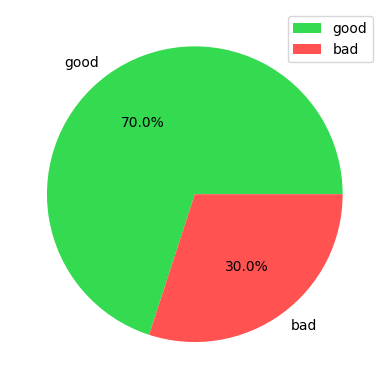

In [ ]:
import matplotlib.pyplot as plt
risks_data = df["Risk"].value_counts()
risks_labels = risks_data.keys()
risks_colors = ["#34da4f","#ff5251"]
plt.pie(risks_data, labels=risks_labels, colors=risks_colors, autopct="%.1f%%")
plt.legend()
plt.show()

<div dir=rtl>
    ۷.(۳ نمره)
    همان کار سوال قبلی را این‌بار به تفکیک جنسیت انجام دهید.(در یک نمودار این کار را انجام دهید.)
    </div>

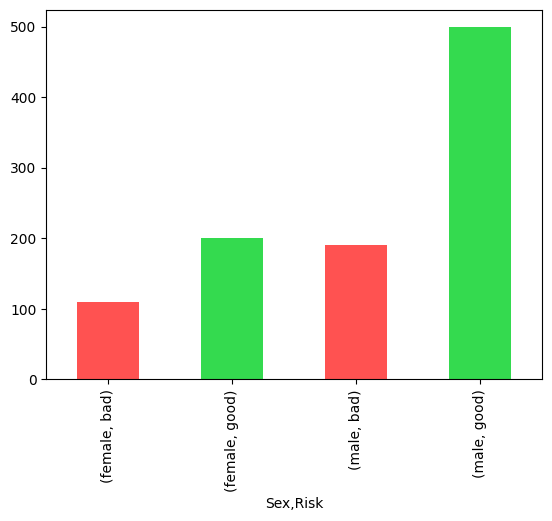

In [ ]:
# Some useful colors: ["#378aff","#ffec21"]
#method A
df.groupby(["Sex", "Risk"]).count()["Id"].rename("Count").plot(kind="bar", color=["#ff5251", "#34da4f"])
plt.show()

NameError: name 'sex_risk_stats' is not defined

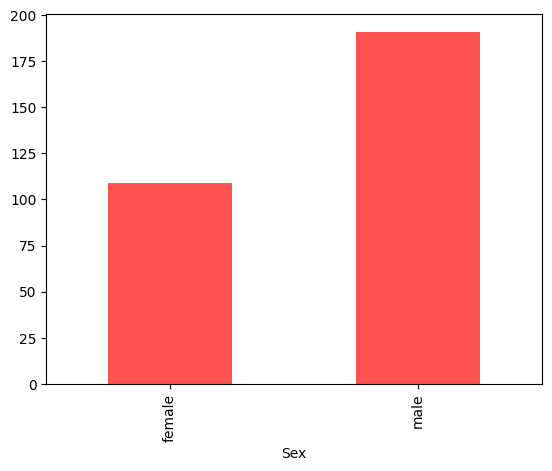

In [ ]:
# method B
sk_stats = df.groupby(["Risk", "Sex"]).count()["Id"].rename("Count")
sk_stats.loc["bad"].plot(kind="bar", color=["#ff5251"])
sk_stats.loc["good"].plot(kind="bar", color=["#34da4f"], bottom=sex_risk_stats.loc["bad"])
plt.legend(["bad", "good"])
plt.show()

In [ ]:
# method C
sk_stats = df.groupby(["Sex", "Risk"]).count()["Id"].rename("Count")
sk_labels = sex_risk_stats.loc["female"].keys()
ax = plt.subplot()
ax.bar(sex_ris_labels, sex_risk_stats.loc["female"], label="female", alpha=0.5)
ax.bar(sex_ris_labels, sex_risk_stats.loc["male"], label="male", alpha= 0.2)
plt.legend()
plt.show()

NameError: name 'sex_risk_stats' is not defined

<div dir=rtl>
    ۸.(۲ نمره)
    بجای تفکیک بر حسب جنسیت افراد را برحسب زمان(Duration) دسته‌بندی نمایید و ریسک وام‌دهی به آن‌ها را در یک نمودار به نمایش بگذارید.
    </div>

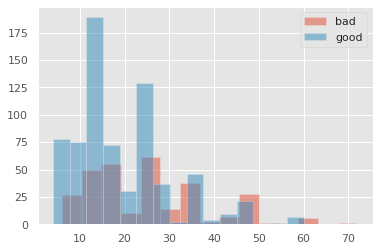

In [ ]:
df.groupby("Risk").apply(
    lambda x: plt.hist(x["Duration"], alpha=0.5, label=x["Risk"], bins=15)
)
plt.legend()
plt.show()

<div dir=rtl>
    ۹.(۲ نمره)
چهار نوع دسته‌بندی شغلی برای این افراد وجود دارد.
در یک نمودار مشخص کنید که از هر جنسیت چند نفر در هر دسته شغلی مشغول به فعالیت هستند.
</div>

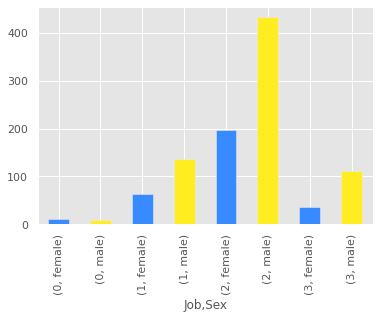

In [ ]:
df.groupby(["Job", "Sex"]).count()["Id"].rename("Count").plot(kind="bar", color=["#378aff","#ffec21"])
plt.show()

<div dir=rtl>
    ۱۰.(۴ نمره)
    .نمودار توزیع تخمینی سن وام‌گیرندگان را نمایش دهید
    این نمودار چه چیزی را نمایش می‌دهد؟
</div>

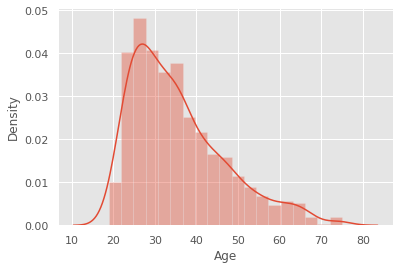

In [ ]:
sns.distplot(df["Age"])
plt.show()
# This shows approximate probability of a random recipient having age of x

<div dir=rtl>
    ۱۱.(۴ نمره)
    در این بانک به ۸ دلیل وام به متقاضیان پرداخت می‌گردد.
    در هر دسته شغلی مشخص کنید که علت عمده‌ای که افراد می‌خواهند وام بگیرند چیست؟
</div>

In [ ]:
df.groupby("Job").apply(lambda x: x["Purpose"].mode()).rename(columns={0:"Most Frequent Loan Puropose"})

,Most Frequent Loan Puropose
Job,
0,car
1,car
2,radio/TV
3,car


<div dir=rtl>
    ۱۲.(۶ نمره)
    برای تصمیم‌گیری راجع به ریسک پرداخت وام به دلایل مختلف به تفکیک جنسیت علت پرداخت وام و میزان خوب یا بد بودن  ریسک را بررسی نمایید و در صورتی که در هر علت و جنسیت تعداد افراد با ریسک خوبی که به آن علت وام می‌گیرند حداقل ۲ برابر تعداد افراد با ریسک بدش بود آن علت، جنسیت و تعداد افرادی خوب و بدی که برای دریافت آن اقدام کرده‌اند را در نمودارهایی به تفکیک نمایش دهید.
</div>

In [ ]:
def is_riskless(x):
    risk_col = x["Risk"]
    return risk_col[risk_col == "good"].count()/risk_col.count() > 2/3

spr_riskless_df = df.groupby(["Sex", "Purpose"]).filter(is_riskless).groupby(
    ["Sex", "Purpose"]).apply(lambda x: x.groupby(["Risk"]).count()["Id"])

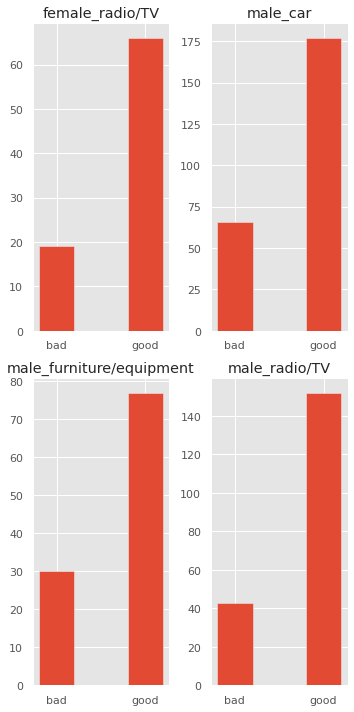

In [ ]:
def get_plt_label(label_tuple):
    return label_tuple[0] + "_" + label_tuple[1]

def add_plot(x, fig):
    global counter
    ax = fig.add_subplot(plot_positions[counter])
    counter += 1
    ax.bar(x.index, height=x, width= 0.4)
    plt.title(get_plt_label(x.name))

fig = plt.figure(figsize=(5, 10))
counter = 0
plot_positions =[221, 222, 223, 224]
temp = spr_riskless_df.apply(lambda x: add_plot(x, fig), axis=1)
fig.tight_layout()

<div dir=rtl>
    ۱۳.(۶ نمره)
    در چهار نمودار به تفکیک میزان ریسک وام‌دهی هر گروه شغلی را به ازای جنسیت نمایش دهید.
</div>

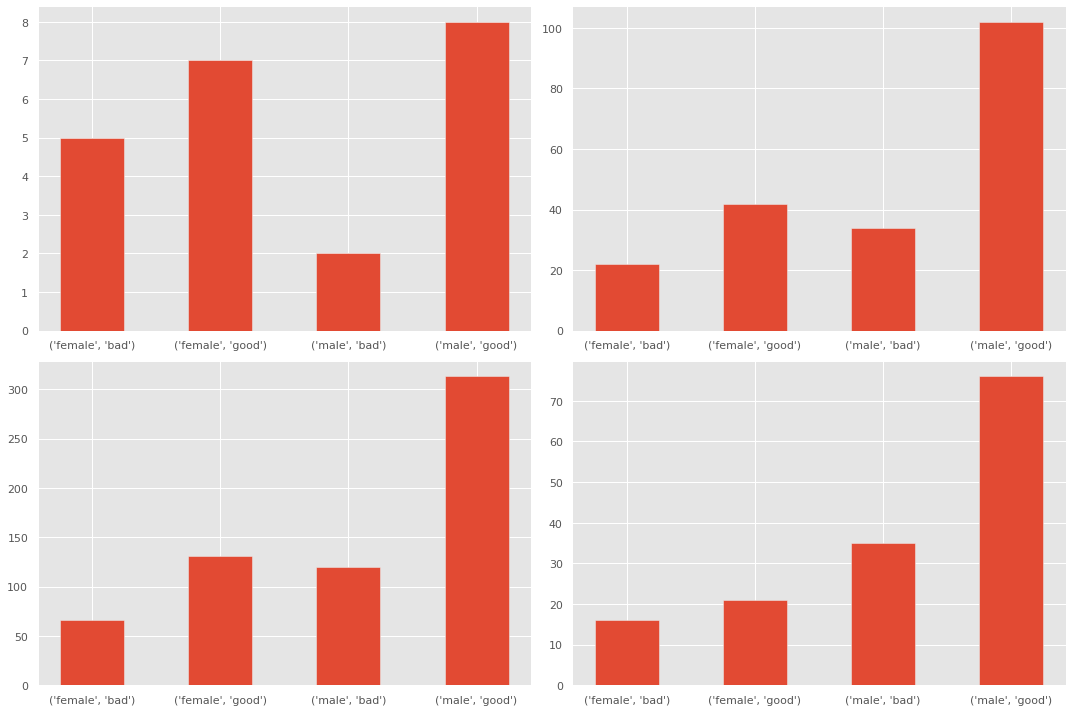

In [ ]:
def add_plot(x, fig):
    global counter
    ax = fig.add_subplot(plot_positions[counter])
    counter += 1
    ax.bar(list(map(str, x.index)), height=x, width=0.5)

fig = plt.figure(figsize=(15, 10))
counter = 0
df.groupby(["Job"]).apply(lambda x:
                         add_plot(x.groupby(["Sex", "Risk"]).count()["Id"], fig))
fig.tight_layout()

<div dir=rtl>
    ۱۴.(۷ نمره)
    تمام داده‌ها را بصورت عددی در بیاورید.
</div>

In [ ]:
unique_values_map = {
    ('Sex', 'male'): 1,
    ('Sex', 'female'): 0,

    ('Housing', 'free'): 0,
    ('Housing', 'rent'): 1,
    ('Housing', 'own'): 2,

    ('Saving accounts', 'no-info'): 0,
    ('Saving accounts', 'little'): 1,
    ('Saving accounts', 'moderate'): 2,
    ('Saving accounts', 'rich'): 3,
    ('Saving accounts', 'quite rich'): 4,

     ('Checking account', 'no-info'): 0,
     ('Checking account', 'little'): 1,
     ('Checking account', 'moderate'): 2,
     ('Checking account', 'rich'): 3,

     ('Purpose', 'radio/TV'): 0,
     ('Purpose', 'education'): 1,
     ('Purpose', 'furniture/equipment'): 2,
     ('Purpose', 'car'): 3,
     ('Purpose', 'business'): 4,
     ('Purpose', 'domestic appliances'): 5,
     ('Purpose', 'repairs'): 6,
     ('Purpose', 'vacation/others'): 7,

     ('Risk', 'bad'): 0,
     ('Risk', 'good'): 1,

     ('Loaned Before', False): 0,
     ('Loaned Before', True): 1
        }
# This mapping was needed to be set manually,
# because of the importance of some orders in column values which might be missed if done automatically.

In [ ]:
numerical_df = df[df.columns[df.dtypes != np.int64]]
unique_col_values = numerical_df.apply(lambda col: col.unique())
c = {}
'''
for key in unique_col_values.keys():
    index = 0
    for value in unique_col_values[key]:
        unique_values_map[key,value] = index
        index += 1
'''
# Another way to automatically convert non-numerical columns to numbers. commented due to order concerns

numerical_df = numerical_df.apply(lambda col: col.apply(lambda field: unique_values_map[col.name, field]))
df.update(numerical_df)
df = df.astype("int64")
df

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,1,2,2,0,1,1169,6,0,1,1
1,1,22,0,2,2,1,2,5951,48,0,0,1
2,2,49,1,1,2,1,0,2096,12,1,1,0
3,3,45,1,2,0,1,1,7882,42,2,1,0
4,4,53,1,2,0,1,1,4870,24,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1,2,1,0,1736,12,2,1,1
996,996,40,1,3,2,1,1,3857,30,3,1,1
997,997,38,1,2,2,1,0,804,12,0,1,1
998,998,23,1,2,0,1,1,1845,45,0,0,0


In [ ]:
df[df["Checking account"]==3]

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
27,27,42,1,2,2,3,3,409,12,0,0,0
34,34,33,1,3,0,1,3,1474,12,2,0,1
37,37,37,0,2,0,1,3,2100,18,0,1,0
38,38,37,0,2,0,1,3,1225,10,5,0,1
58,58,23,1,3,0,1,3,1961,18,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
936,936,28,1,1,0,1,3,745,9,0,1,1
956,956,49,0,1,0,0,3,3656,30,0,0,1
975,975,57,1,1,0,2,3,1258,24,0,0,1
982,982,28,1,3,0,4,3,2923,21,3,0,0


<div dir=rtl>
    ۱۵.(۵ نمره)
    نمودار heatmap از correlation ستون‌های مختلف با هم بکشید و چند جمله راجع به نتیجه‌ای که شما از مشاهده این نمودار گرفتید صحبت کنید.
</div>

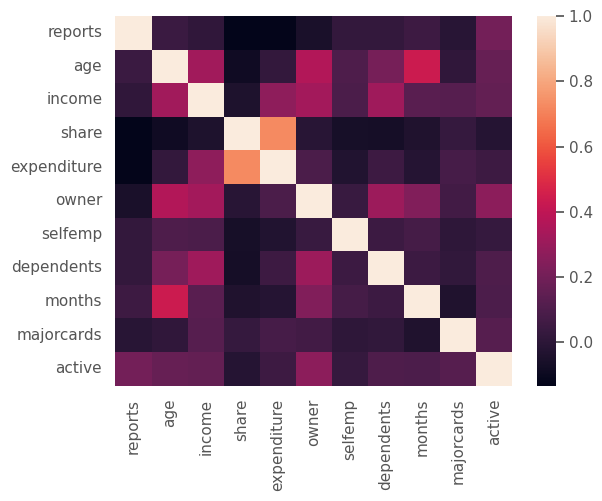

In [ ]:
sns.heatmap(df.corr())
plt.show()

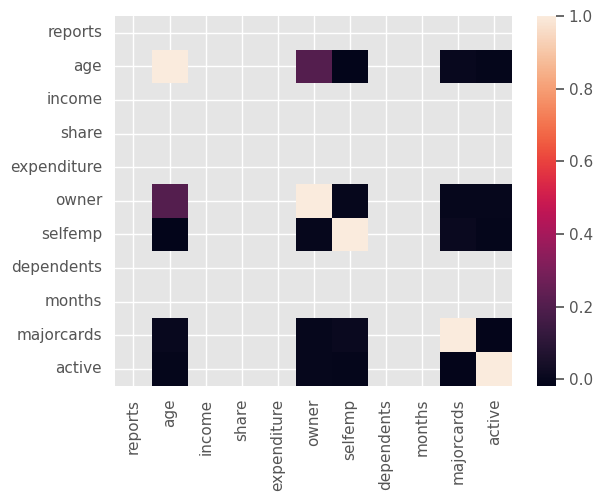

In [ ]:
#افرادی که داده ای برای مالک بودنشان وجود ندارد به احتمال زیاد برای سن شان هم وجود ندارد
sns.heatmap(df.isna().corr());

In [ ]:
#انتخاب بین استفاده از میانه (Median) یا میانگین (Mean) برای پر کردن مقادیر گمشده (NaN) در داده‌ها در یادگیری ماشین به ویژگی‌های داده و شرایط خاص مسئله بستگی دارد. در ادامه، شرایط مناسب برای هر روش توضیح داده می‌شود:
#اگر داده‌ها نرمال و بدون مقادیر پرت هستند، از میانگین استفاده کنید.Mean
#گر داده‌ها چوله یا دارای مقادیر پرت هستند، از میانه استفاده کنید.Median
#داده‌هایی که به دسته‌های مشخص تقسیم شده‌اندMedian
#قبل از تصمیم‌گیری، توزیع داده‌ها را با استفاده از هیستوگرام یا چگالی احتمال (Density Plot) بررسی کنید.
#آزمایش و ارزیابی:
#گاهی اوقات بهترین راه، آزمایش هر دو روش (میانه و میانگین) و بررسی تاثیر آن‌ها بر دقت مدل است.

There is no order defined for column *Purpose*, so no interpretation is possible from it's heapmap.

Since *Risk* column is the target column, I try to explain its relation with others.

*Risk* has a negative correlation with *Checking Acount*, *Credit amount* and duration, which means longer the loan duration and richer the recipient, more risky loan for the bank.
Except for *Housing* and columns mentioned before, other columns have around 0 correlation with *Risk* and seem to have no effect on it. *Housing* has positive correlation and less homeless the recipient, more likely for the bank to have its loan back in time.

<div dir=rtl>
    <h2>
        کاهش ابعاد
        (۴۲ نمره)
    </h2>
</div>

<div dir=rtl>
    ۱۶.
    (۳ نمره)
    برای بدست آوردن PCA ما نیاز به تمامی ستون‌ها نداریم و مثلا ستون id یا index فایده‌ای برای ما نخواهد داشت برای همین dataframe جدیدی ایجاد کنید و در آن از ستون‌های
    <br/>
    'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'
    <br/>
    استفاده کنید.
</div>

In [ ]:
df2 = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']].copy()

# missing 'Loaned before' column for some reason (It's not mentioned in the problem)

df2

KeyError: "None of [Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',\n       'Credit amount', 'Duration', 'Purpose'],\n      dtype='object')] are in the [columns]"

<div dir=rtl>
    ۱۷.(۶ نمره)
    یکی از مواردی که ممکن است تاثیر مخربی روی تحلیل ما بگذارد تفاوت اندازه‌های اعداد ستون‌های مختلف است(چرا؟ خیلی کوتاه توضیح دهید) برای همین بهتر است داده‌ها را نرمالایز کنیم.
</div>

In [ ]:
# <short answer>
df2 = df2.apply(lambda col: col/col.max())
df2 = df2.astype("float64")
df2 = df2.apply(lambda col: col-col.mean())
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.419387,0.31,0.032000,0.1975,-0.30125,-0.000333,-0.114104,-0.206986,-0.299429
1,-0.180613,-0.69,0.032000,0.1975,-0.05125,0.333000,0.145448,0.376347,-0.299429
2,0.179387,0.31,-0.301333,0.1975,-0.05125,-0.333667,-0.063790,-0.123653,-0.156571
3,0.126053,0.31,0.032000,-0.8025,-0.05125,-0.000333,0.250257,0.293014,-0.013714
4,0.232720,0.31,0.032000,-0.8025,-0.05125,-0.000333,0.086775,0.043014,0.129143
...,...,...,...,...,...,...,...,...,...
995,-0.060613,-0.69,-0.301333,0.1975,-0.05125,-0.333667,-0.083329,-0.123653,-0.013714
996,0.059387,0.31,0.365333,0.1975,-0.05125,-0.000333,0.031792,0.126347,0.129143
997,0.032720,0.31,0.032000,0.1975,-0.05125,-0.333667,-0.133915,-0.123653,-0.299429
998,-0.167280,0.31,0.032000,-0.8025,-0.05125,-0.000333,-0.077413,0.334681,-0.299429


<div dir=rtl>
    ۱۸.(۳ نمره)
    حال نیاز است که ماتریس کواریانس این داده‌ها بدست بیاورید.
</div>

In [ ]:
cov_matrix = df2.cov()
cov_matrix

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Age,0.023005,0.011348,0.000518,-0.005735,-0.000634,-0.002374,0.000760,-0.000918,0.002510
Sex,0.011348,0.214114,0.007087,0.005280,-0.001364,-0.003233,0.006627,0.006311,0.005543
Job,0.000518,0.007087,0.047468,-0.007494,-0.002446,-0.003771,0.009526,0.007696,0.001250
Housing,-0.005735,0.005280,-0.007494,0.113858,0.002124,-0.005273,-0.008870,-0.007767,-0.006369
Saving accounts,-0.000634,-0.001364,-0.002446,0.002124,0.062749,-0.001769,-0.004126,-0.002590,0.000226
Checking account,-0.002374,-0.003233,-0.003771,-0.005273,-0.001769,0.101768,0.001200,0.001873,0.002426
Credit amount,0.000760,0.006627,0.009526,-0.008870,-0.004126,0.001200,0.023473,0.016037,0.007654
Duration,-0.000918,0.006311,0.007696,-0.007767,-0.002590,0.001873,0.016037,0.028051,0.004116
Purpose,0.002510,0.005543,0.001250,-0.006369,0.000226,0.002426,0.007654,0.004116,0.054233


<div dir=rtl>
    ۱۹.(۲ نمره)
    باز برای آنکه ایده‌ای از این داده‌ها داشته باشیم heatmap ماتریس کواریانس را رسم کنید
</div>

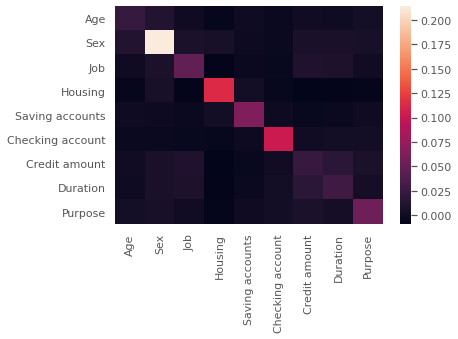

In [ ]:
sns.heatmap(cov_matrix)
plt.show()

<div dir=rtl>
    ۲۰.(۴ نمره)
مقدار و بردار ویژه‌ی ماتریس کواریانس را بدست بیاورید.
</div>

In [ ]:
df_eig_values, df_eig_vectors =  np.linalg.eig(cov_matrix)
df_eig_vectors

array([[-5.82695413e-02, -5.42902293e-02, -4.51339521e-02,
        -6.48109085e-02, -9.78180684e-01,  1.54736168e-01,
        -8.09360896e-02,  9.39269209e-03, -3.14529312e-04],
       [-9.93895123e-01, -1.93279846e-02,  2.84049447e-02,
         1.41835097e-03,  6.18718057e-02,  4.09955829e-03,
        -2.29055915e-02,  4.50426423e-02, -6.77615583e-02],
       [-4.53175333e-02, -1.18662427e-01, -1.08550010e-01,
        -6.40700391e-02,  3.99643311e-02,  5.30833310e-01,
         7.25874482e-01, -2.48542899e-01,  3.09724050e-01],
       [-3.75709385e-02,  9.22676089e-01,  2.65728163e-01,
         7.47216103e-03, -7.46618502e-02, -3.14364384e-02,
         7.76203673e-02, -1.53545071e-01,  2.01062968e-01],
       [ 1.05696048e-02,  6.38083139e-02, -1.85082278e-02,
         2.66445820e-02, -2.62109401e-02, -6.48251316e-02,
         2.36082441e-01,  9.12526950e-01,  3.18488039e-01],
       [ 3.05811810e-02, -2.76596343e-01,  9.55627039e-01,
         8.75666222e-04, -2.90822809e-02,  4.780207

<div dir=rtl>
    ۲۱.(۳ نمره)
    برای انتخاب اجزای اساسی(Principle Components) سه کار ریز را انجام دهید:
    <br\>
هر بردار ویژه را با مقدار ویژه متناظرش مربوط کنید (می‌توانید بصورت جفتیpair آن‌ها را کنار هم قرار دهید)
        <br\>
            لیستی که بردار و مقدار ویژه‌ها دارید را بر اساس مقدار ویژه‌ها مرتب کنید
            <br\>
                مقدار ویژه‌های مرتب شده را به ترتیب نزولی در خروجی نمایش دهید
</div>

In [ ]:
df_eig_pairs = [(value, vector) for value, vector in zip(df_eig_values, df_eig_vectors)]
df_eig_pairs = sorted(df_eig_pairs,key=lambda x: x[0], reverse=True)
list(map(lambda x: x[0], df_eig_pairs))

[0.2161185499901284,
 0.12002349937854943,
 0.10072197879724913,
 0.06429817233677775,
 0.05681679989089601,
 0.049265632351695274,
 0.03085876471219068,
 0.021536093612613764,
 0.009079293847380144]

<div dir=rtl>
    ۲۲.(۴ نمره)
همه‌ی
    explained variance
    را بدست بیاورید و در نمودار pie نمایش دهید
    حتما درصد هرکدام از اسلایس‌ها در نمودار مشخص شده‌باشد.
</div>

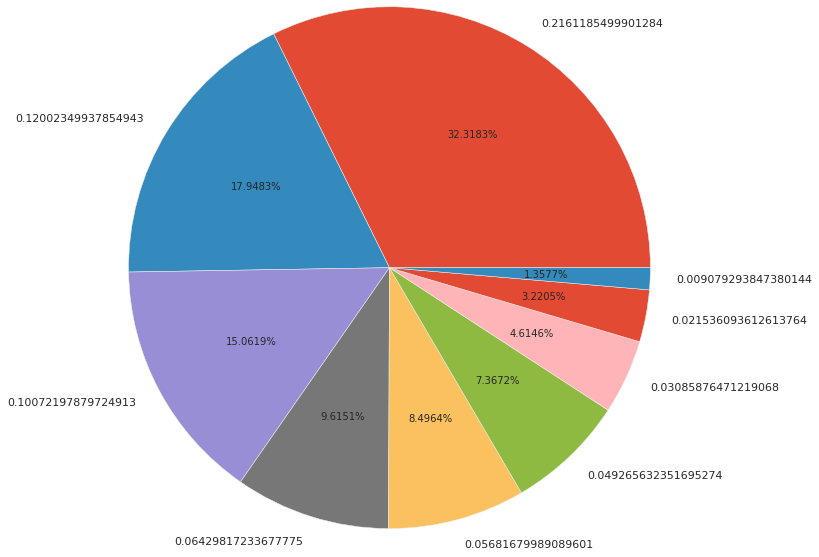

In [ ]:
sorted_eig_values = [pair[0] for pair in df_eig_pairs]
eig_value_sum = sum(sorted_eig_values)
expl_variances_percent = [100*eig_value/eig_value_sum for eig_value in sorted_eig_values]
plt.pie(expl_variances_percent, labels = sorted_eig_values, radius=3, autopct="%.4f%%")
plt.show()

<div dir=rtl>
    ۲۳.(۴ نمره)
با توجه به آنچه در بخش قبل دیدید تعداد کامپوننت‌ها را طوری انتخاب کنید که پوشش حداقل ۶۰٪ای از اطلاعات داشته باشد و سپس projection matrix را با استفاده از آن‌ها تشکیل دهید.
    </div>

In [ ]:
eigen_count = len(sorted_eig_values)
coverage = 60
coverage_sum = 0
for index in range(eigen_count):
    if coverage_sum > coverage:
        break
    coverage_sum += expl_variances_percent[index]

proj_matrix = np.array(list(map(lambda x: x[1], df_eig_pairs))[:index]).T
proj_matrix

array([[-5.82695413e-02, -9.93895123e-01, -4.53175333e-02],
       [-5.42902293e-02, -1.93279846e-02, -1.18662427e-01],
       [-4.51339521e-02,  2.84049447e-02, -1.08550010e-01],
       [-6.48109085e-02,  1.41835097e-03, -6.40700391e-02],
       [-9.78180684e-01,  6.18718057e-02,  3.99643311e-02],
       [ 1.54736168e-01,  4.09955829e-03,  5.30833310e-01],
       [-8.09360896e-02, -2.29055915e-02,  7.25874482e-01],
       [ 9.39269209e-03,  4.50426423e-02, -2.48542899e-01],
       [-3.14529312e-04, -6.77615583e-02,  3.09724050e-01]])

<div dir=rtl>
    ۲۴.(۵ نمره)
        با استفاده از ماتریس بدست آمده در مرحله قبل X را کاهش دهید
    و در یک نمودار scatter که x و y آن ازpricipal componentهای اول و دوم شما بدست آمده‌اند بر حسب Risk نتایج را نشان دهید
</div>

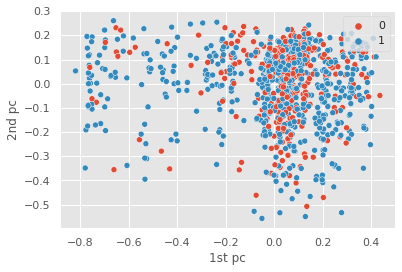

In [ ]:
# good : 0, bad: 1
reduced_df = pd.DataFrame(df2.to_numpy().dot(proj_matrix)).join(df["Risk"])
sns.scatterplot(x=reduced_df[0], y=reduced_df[1], hue=reduced_df["Risk"])
plt.legend(loc='upper right')
plt.xlabel("1st pc") # principal component
plt.ylabel("2nd pc")
plt.show()

<div dir=rtl>
    ۲۵.(۵ نمره)
    در این قسمت می‌خواهیم مقایسه‌ای بین tSNE و PCA داشت باشیم.
    برای tSNE از scikit learn استفاده کنید و نیازی نیست که آنرا خودتان پیاده‌سازی کنید.
    تبدیل X را با استفاده از tSNE با دو مولفه اصلی بدست بیاورید.
    توجه کنید که tSNE پارامترهای مختلفی دارد که می‌توان با تنظیم آن‌ها به نتایج مختلفی رسید. در مورد انتخابتان برای این پارامترها توضیح دهید.
</div>

In [ ]:
from sklearn import manifold
reduce_tsne_df = pd.DataFrame(manifold.TSNE().fit_transform(df2)).join(df["Risk"])
reduce_tsne_df

,0,1,Risk
0,-11.027331,12.076222,1
1,54.622849,21.907740,0
2,-11.090343,19.685301,1
3,-17.058807,-44.350613,1
4,-18.492407,-42.074680,0
...,...,...,...
995,42.729015,16.487741,1
996,-18.749632,7.899919,1
997,-40.837669,6.988762,1
998,-23.125872,-43.125256,0


<div dir=rtl>
    ۲۶.(۵ نمره)
    حال مانند کاری که در بخش ۲۴ کردید نمودار مربوط به این تبدیل را بکشید.
    بطور خلاصه اگر توضیحی راجع به این دو نمودار دارید بنویسید.
</div>

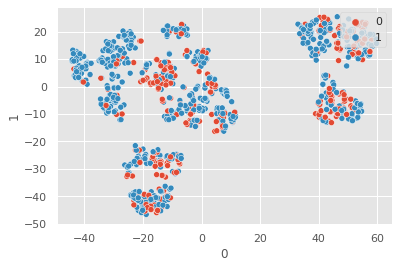

In [ ]:
sns.scatterplot(x=reduce_tsne_df[0], y=reduce_tsne_df[1], hue=reduce_tsne_df["Risk"])
plt.legend(loc='upper right')
plt.show()